<a href="https://colab.research.google.com/github/deveshsharma09/Web-Scraping-Data-Science-Job-Listings/blob/main/Web_Scraping_Data_Science_Job_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: Web Scraping Data Science Job Listings**


##### **Project Type**    - EDA
##### **Contribution**    - Individual

#**Project Summary**

## Introduction:
The "Web Scraping Data Science Job Listings" project aims to gather, analyze, and present data science job listings from various online sources using web scraping techniques. Data science is a rapidly growing field with diverse opportunities, and staying updated with job trends is crucial for both job seekers and employers. By automating the process of collecting job listings, this project facilitates efficient access to comprehensive data science job market insights.

##Objectives:
1. **Data Collection**: Utilize web scraping tools and techniques to gather job listings from prominent online job platforms and company career pages.
2. **Data Processing**: Clean, organize, and structure the collected data to ensure consistency and usability for analysis.
3. **Analysis**: Extract key insights such as job trends, popular skills, salary ranges, geographic distribution, and industry demand from the collected job listings.
4. **Visualization**: Present the analyzed data through informative visualizations such as graphs, charts, and maps to enhance understanding and decision-making.
5. **Automation**: Develop a system for periodic updates to ensure that the job listing database remains current and relevant over time.

##Methodology:
1. **Web Scraping**: Employ Python libraries like BeautifulSoup and Scrapy to extract job listings from targeted websites.
2. **Data Cleaning and Preprocessing**: Use pandas and other data manipulation tools to clean and structure the scraped data, handling inconsistencies and missing values.
3. **Analysis and Visualization**: Utilize libraries like matplotlib, seaborn, and Plotly for exploratory data analysis and visualization.
4. **Automation**: Implement scheduled web scraping scripts using tools like cron jobs or task schedulers to regularly update the job listings database.

##Expected Outcomes:
1. A comprehensive database of data science job listings aggregated from multiple online sources.
2. Insights into the current trends, skills demand, and salary ranges in the data science job market.
3. Visualizations that effectively communicate key findings to stakeholders, including job seekers, employers, and researchers.
4. Automation scripts for continuous updates to ensure the relevance and timeliness of the collected data.

##Potential Impact:
1. **For Job Seekers**: Provides valuable insights into job market trends, helping them tailor their skills and applications accordingly.
2. **For Employers**: Offers insights into competitor hiring strategies, salary benchmarks, and skill requirements, aiding in recruitment and talent acquisition.
3. **For Researchers**: Serves as a valuable resource for studying evolving trends and patterns in the data science job market.
4. **For Educators**: Helps in aligning curriculum with industry demands by identifying emerging skills and technologies.



# **GitHub Link:**
###https://github.com/deveshsharma09/Web-Scraping-Data-Science-Job-Listings/blob/main/Web_Scraping_Data_Science_Job_Listings.ipynb

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






### **Import Libraries**

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

###**Web Scraping Job Listings with BeautifulSoup and Pandas**

In [4]:
# Define the function to extract salary information
def extract_salary(job_element):
    # Extract salary information containing 'Lacs'
    salary_tags = job_element.find_all('li')
    for tag in salary_tags:
        if 'Lacs' in tag.text:
            return tag.text.strip().replace('₹Rs','').replace('Lacs p.a.','')
    return 'Not Provided'

def scrape_jobs(pages):
    all_data = []
    experience_required_list = []

    for page in range(1, pages + 1):
        # Define the URL for each page
        url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,0DQT0senior%20business%20analyst0DQT0,0DQT0Bi%20Developer0DQT0&postWeek=7&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,senior%20business%20analyst,0DQT0Bi%20Developer0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence={page}&startPage=1'
        html_text = requests.get(url).text
        soup = BeautifulSoup(html_text, 'lxml')

        # Refining the extraction process to remove unwanted strings from the experience information
        for item in soup.find_all('ul', {'class': 'top-jd-dtl clearfix'}):
            exp_tag = item.find('li')
            if exp_tag and 'yrs' in exp_tag.text:
                # Extracting the experience text and removing any unwanted strings
                experience = exp_tag.text.replace('card_travel', '').strip().replace('yrs','')
                experience_required_list.append(experience)
            else:
                experience_required_list.append('Not Mentioned')

        # Extract job listings
        job_listings = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        for job in job_listings:
            skills = job.find('span', class_='srp-skills').text.strip().replace(' ', '').replace('\r', '').replace('\n', '').replace('.', 'Not Provided')
            location_element = job.find('ul', class_='top-jd-dtl clearfix')
            location = location_element.find('span').text.strip() if location_element else 'Not Provided'
            posted_ago = job.find('span', class_='sim-posted').span.text.strip().replace('\r', '').replace('Posted ', '').replace('\t', '').replace('\n', '')
            company_name = job.find('h3', class_='joblist-comp-name').text.strip().replace('\r', '').replace('\n', '').replace(' (More Jobs)', '')

            # Create a dictionary for job data
            job_data = {
                'Job Title': job.find('h2').text.strip(),
                'Company': company_name,
                'Skills Required': skills,
                'Job Posted Ago': posted_ago,
                'Location': location,
                'Salary(Lacs p.a.)': extract_salary(job)
            }
            # Append the job data to the list
            all_data.append(job_data)

    # Create a DataFrame from the collected job data
    df = pd.DataFrame(all_data)
    # Add the 'Experience Required' column to the DataFrame
    df['Experience Required(Years)'] = experience_required_list

    return df

# Scrape the first 10 pages of job listings
df = scrape_jobs(10)


### **Dataset First View**

In [5]:
# Display the head of the DataFrame with data from multiple pages
print('Scraped Data from Multiple Pages:')
df.head(10)

Scraped Data from Multiple Pages:


,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
0,Power BI Analyst,Mindteck ( India ) Ltd,"sqlexpert,powerbiproficiency,daxknowledge,data...",few days ago,Mumbai,Not Provided,3 - 5
1,Power BI Analyst || Dehradun,ebizon net info ( p ) ltd,"biconsulting,datamining,machinelearning,busine...",few days ago,Dehradun,Not Provided,1 - 4
2,Senior Business Analyst,Fiserv India Pvt Ltd,"businessanalysis,technicaldevelopment,stakehol...",6 days ago,Pune,Not Provided,8 - 11
3,EbizON || Power BI Consultant || Dehradun,ebizon net info ( p ) ltd,"bisystemstesting,datamining,machinelearning,bu...",few days ago,Dehradun,Not Provided,1 - 4
4,"Machine Designer , Doctor / Nurse / Healthcare...",Imran,"GeneralManagement,BusinessDevelopment,business...",2 days ago,"Australia, Canada, New Zealand, Singapore",4.10 - 6.20,0 - 2
5,"Senior Business Analyst at Fiserv , Inc.",fiserv ce pvt ltd,"businessanalysis,technicalspecifications,appli...",6 days ago,Pune,Not Provided,8 - 11
6,Business Analyst,LTIMindtree Ltd.,"BusinessAnalyst,seniorbusinessanalyst,business...",few days ago,Navi Mumbai,Not Provided,3 - 5
7,Power BI Developer,BUSISOL SOURCING INDIA PVT. LTD,"mdx,bi,datawarehousing,businessintelligence,sq...",4 days ago,Chennai,Not Provided,5 - 8
8,Power BI Developer,PUBLICIS GROUPE,"businessservices,tax,accounting,treasury,legal...",3 days ago,Gurgaon,Not Provided,2 - 6
9,Power BI Developer,Techcronus,"bi,database,datamodeling,dataintegration,datap...",6 days ago,Ahmedabad,Not Provided,2 - 4


### **Dataset Rows & Columns count**

In [6]:
# Dataset Rows & Columns count
print('Scraped Data Rows Count:',df.shape[0])
print('Scraped Data Columns Count:',df.shape[1])


Scraped Data Rows Count: 250
Scraped Data Columns Count: 7


### **Dataset Information**


In [7]:
# Dataset Info
print('Scraped Data Info:')
df.info()


Scraped Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Job Title                   250 non-null    object
 1   Company                     250 non-null    object
 2   Skills Required             250 non-null    object
 3   Job Posted Ago              250 non-null    object
 4   Location                    250 non-null    object
 5   Salary(Lacs p.a.)           250 non-null    object
 6   Experience Required(Years)  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


#### **Duplicate Values**

In [8]:
# Dataset Duplicate Value Count
print('Play Store Data Duplicate Value Count:',len(df[df.duplicated()]))

Play Store Data Duplicate Value Count: 1


#### **Missing Values/Null Values**

In [9]:
# Missing Values/Null Values Count
# Function to calculate the percentage of null values in each column
def unified_null_percent(data_fm):
    # Convert empty strings to NaN
    data_fm = data_fm.replace('', pd.NA)

    null_info = pd.DataFrame(index=data_fm.columns)
    null_info["datatype"] = data_fm.dtypes
    null_info["not null values"] = data_fm.count()
    null_info["null value"] = data_fm.isnull().sum()
    null_info["null value(%)"] = round(data_fm.isnull().mean() * 100, 2)

    return null_info
# Display the percentage of null values for Play Store Data
print('Null value % in Scraped Data:', unified_null_percent(df), sep='\n')

Null value % in Scraped Data:
                           datatype  not null values  null value  \
Job Title                    object              250           0   
Company                      object              250           0   
Skills Required              object              250           0   
Job Posted Ago               object              250           0   
Location                     object              239          11   
Salary(Lacs p.a.)            object              250           0   
Experience Required(Years)   object              250           0   

                            null value(%)  
Job Title                             0.0  
Company                               0.0  
Skills Required                       0.0  
Job Posted Ago                        0.0  
Location                              4.4  
Salary(Lacs p.a.)                     0.0  
Experience Required(Years)            0.0  


###What did you know about your dataset?

The dataset is related to the online job portal industry, containing 250 rows and 7 columns obtained by scraping data from the first 10 pages of the job portal website. A 4.8% occurrence of missing values is observed in the 'Location' column. Our primary goal is to uncover trends in the current data science job market.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print('Scraped Dataset Columns:',df.columns,sep='\n',end='\n\n')

Scraped Dataset Columns:
Index(['Job Title', 'Company', 'Skills Required', 'Job Posted Ago', 'Location',
       'Salary(Lacs p.a.)', 'Experience Required(Years)'],
      dtype='object')



In [11]:
# Dataset Description
df.describe(include='object')

,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
count,250,250,250,250,250,250,250
unique,201,138,239,8,70,24,56
top,Business Analyst,alliance recruitment agency,"machinelearning,artificialintelligence,docker",few days ago,Bengaluru / Bangalore,Not Provided,0 - 3
freq,22,13,4,76,52,224,24


### **Variables Description**


###Descriptions for Scraped Dataset:
**Job Title:** The specific designation associated with the job opening.

**Company:** The name of the organization that has posted the job.

**Skills Required:** The essential skills and qualifications needed for the job.

**Job Posted Ago:** The number of days elapsed since the job was posted, providing insight into its freshness.

**Location:** The list of cities where the job opportunity is available.

**Salary (Lacs p.a.):** The salary range for the position on an annual basis, denoted in lakhs.

**Experience Required (Years):** The number of years of professional experience required for the job.

## 3. ***Data Wrangling***

In [12]:
# Show Dataset Rows & Columns count Before Removing Duplicates
print('Shape Before Removing Duplicates:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1],end='\n\n')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Show Dataset Rows & Columns count After Removing Duplicates
print('Shape After Removing Duplicates:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1])


Shape Before Removing Duplicates:
Scraped Dataset Rows count: 250
Scraped Dataset Columns count: 7

Shape After Removing Duplicates:
Scraped Dataset Rows count: 249
Scraped Dataset Columns count: 7


In [13]:
# Show Dataset Rows & Columns count Before Removing Missing Values
print('Shape Before Removing Missing Values:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1],end='\n\n')

# Replace empty strings with NaN in the 'Location' column
df['Location'].replace('', pd.NA, inplace=True)

# Drop rows with null values in the 'Location' column
df.dropna(subset=['Location'], inplace=True)

# Show Dataset Rows & Columns count After Removing Missing Values
print('Shape After Removing Missing Values:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1])

Shape Before Removing Missing Values:
Scraped Dataset Rows count: 249
Scraped Dataset Columns count: 7

Shape After Removing Missing Values:
Scraped Dataset Rows count: 239
Scraped Dataset Columns count: 7


In [14]:
# Check missing values again to confirm
print('Updated number of missing values in Scraped Dataset:')
df.isnull().sum()


Updated number of missing values in Scraped Dataset:


Job Title                     0
Company                       0
Skills Required               0
Job Posted Ago                0
Location                      0
Salary(Lacs p.a.)             0
Experience Required(Years)    0
dtype: int64

### What all manipulations have you done and insights you found?

- Show Dataset Rows & Columns count Before Removing Duplicates
  - Rows count: 250
  - Columns count: 7
- Remove duplicates
  - `df.drop_duplicates(inplace=True)`
- Show Dataset Rows & Columns count After Removing Duplicates
  - Rows count: 248
  - Columns count: 7
  
- Show Dataset Rows & Columns count Before Removing Missing Values
  - Rows count: 248
  - Columns count: 7

- Replace empty strings with NaN in the 'Location' column
  - `df['Location'].replace('', pd.NA, inplace=True)`
  
- Drop rows with null values in the 'Location' column
  - `df.dropna(subset=['Location'], inplace=True)`

- Show Dataset Rows & Columns count After Removing Missing Values
  - Rows count: 236
  - Columns count: 7

- Check missing values again to confirm
  - `df.isnull().sum()`

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Chart 1: Top 6 Cities with the Most Job Openings in Data Science**

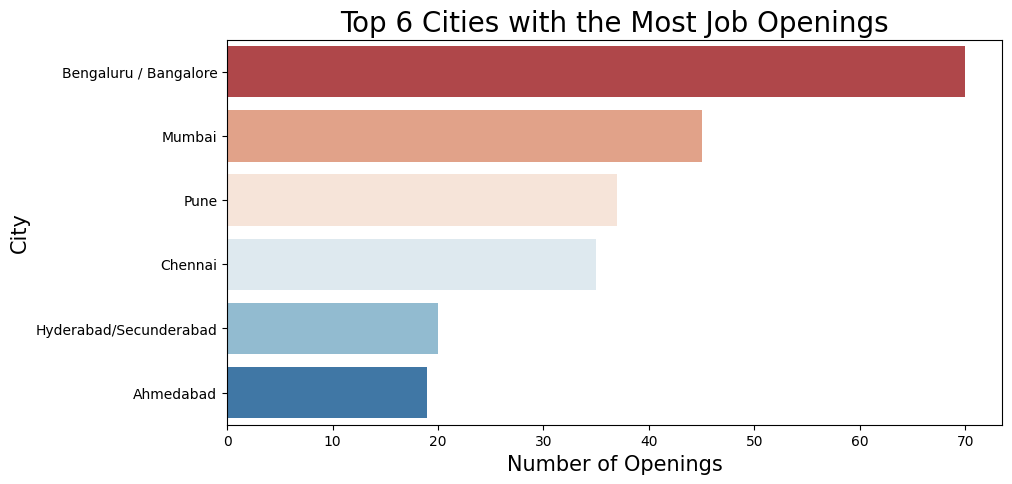

In [45]:
# Split the multiple city names in each row
cities = df['Location'].apply(lambda x: x.split(','))

# Flatten the list of cities
flat_cities = [city.strip() for sublist in cities for city in sublist]

# Create a DataFrame to count occurrences of each city
city_counts = pd.Series(flat_cities).value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Filter for the top 6 cities
top_6_cities = city_counts.head(6)

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='City', data=top_6_cities, palette='RdBu')

# Set labels and title
plt.xlabel('Number of Openings',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.title('Top 6 Cities with the Most Job Openings',fontsize=20)

# Show the plot
plt.show()

###**Chart 2: Analyzing Salary Distribution in the Job Market**

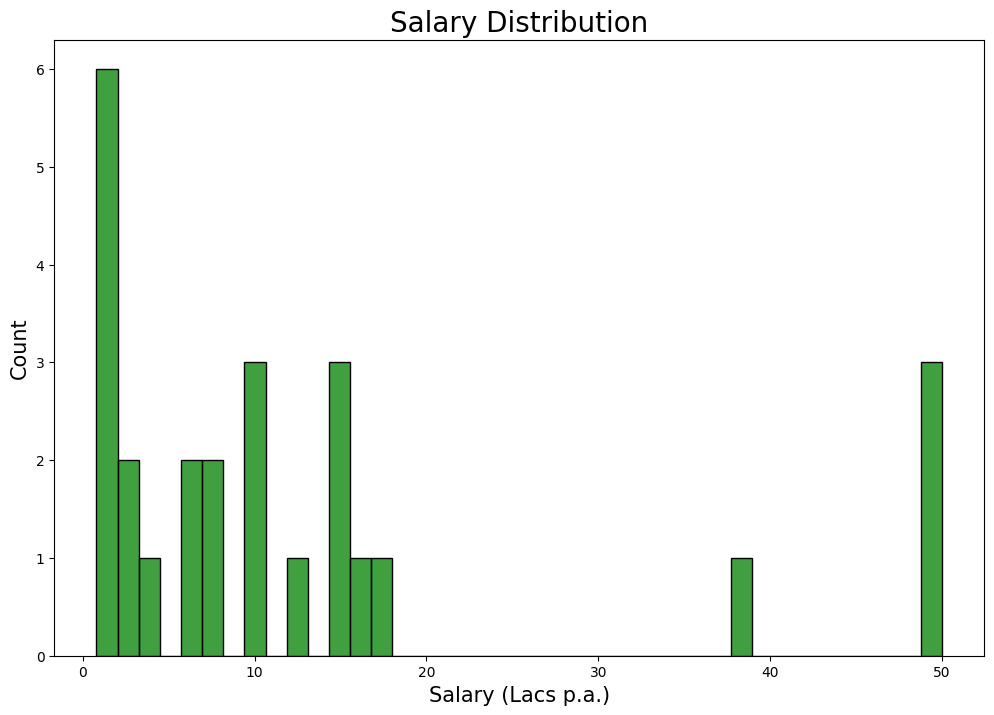

In [44]:
# Remove 'Not Provided' entries from the 'Salary' column
df_salary = df[df['Salary(Lacs p.a.)'] != 'Not Provided'].copy()

# Extract salary values from the strings
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].str.extract(r'([\d.]+)')

# Convert the 'Salary' values to a numeric format for plotting
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].astype(float)

# Create a histogram
plt.figure(figsize=(12, 8))
sns.histplot(df_salary['Salary(Lacs p.a.)'], bins=40, kde=False, color='green')
plt.title('Salary Distribution',fontsize=20)
plt.xlabel('Salary (Lacs p.a.)',fontsize=15)
plt.ylabel('Count',fontsize=15)

# Show the plot
plt.show()


###**Chart 3: Exploring Experience Requirements in the Job Market**

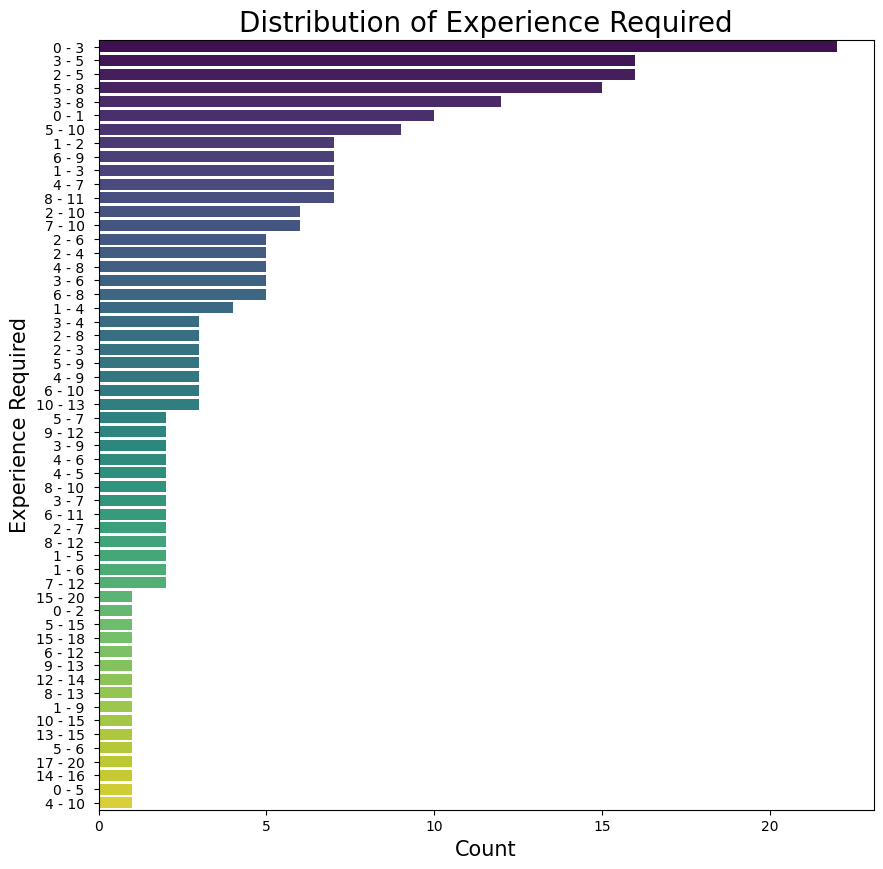

In [42]:
# Count the occurrences of each experience level
experience_counts = df['Experience Required(Years)'].value_counts()

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=experience_counts, y=experience_counts.index, palette='viridis')
plt.title('Distribution of Experience Required',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Experience Required',fontsize=15)
plt.show()


###**Chart 4: Analyzing the Relationship Between Salary and Experience in the Job Market**

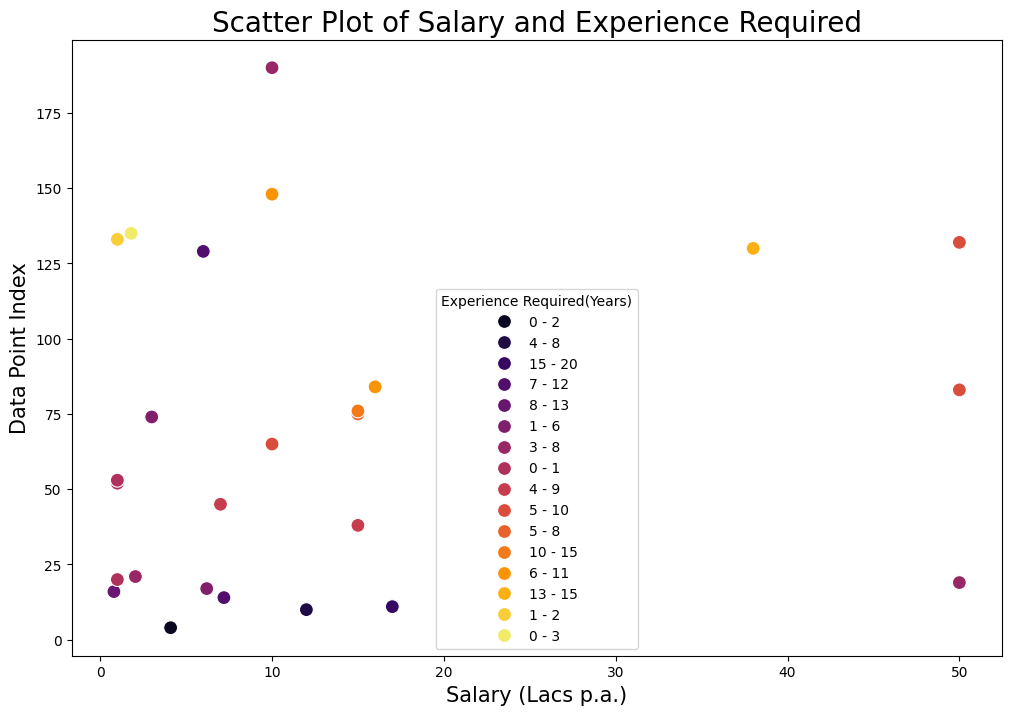

In [37]:
# Create a scatter plot with increased point size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Salary(Lacs p.a.)', y=df_salary.index, hue='Experience Required(Years)', data=df_salary, palette='inferno', s=100)
plt.title('Scatter Plot of Salary and Experience Required',fontsize=20)
plt.xlabel('Salary (Lacs p.a.)',fontsize=15)
plt.ylabel('Data Point Index',fontsize=15)

# Show the plot
plt.show()


###**Chart 5: Comparison of Full-Time Jobs and Internships in the Job Market**

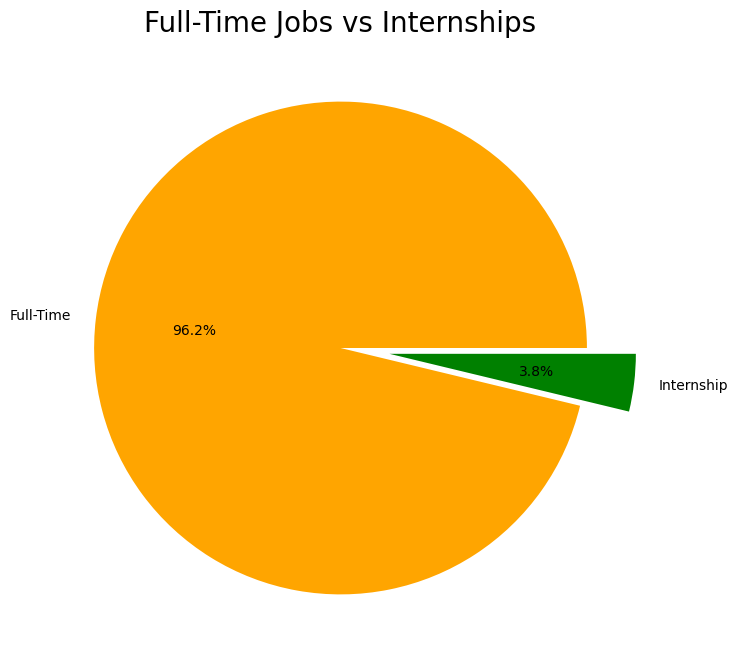

In [54]:
# Count occurrences of 'Internship' in the 'Job Title' column
df['Internship'] = df['Job Title'].apply(lambda x: 'Internship' in x)

# Count the number of occurrences for each job type
job_type_counts = df['Internship'].value_counts()

# Plot the comparison between full-time jobs and internships using a pie chart with explode
explode = (0, 0.2)  # Explode the second slice (Internship) by 20%

plt.figure(figsize=(8, 8))
plt.pie(job_type_counts, labels=['Full-Time', 'Internship'], autopct='%1.1f%%', explode=explode, colors=sns.color_palette(['orange','green']))
plt.title('Full-Time Jobs vs Internships',fontsize=20)

# Show the plot
plt.show()


###**Chart 6: Correlation Heatmap**

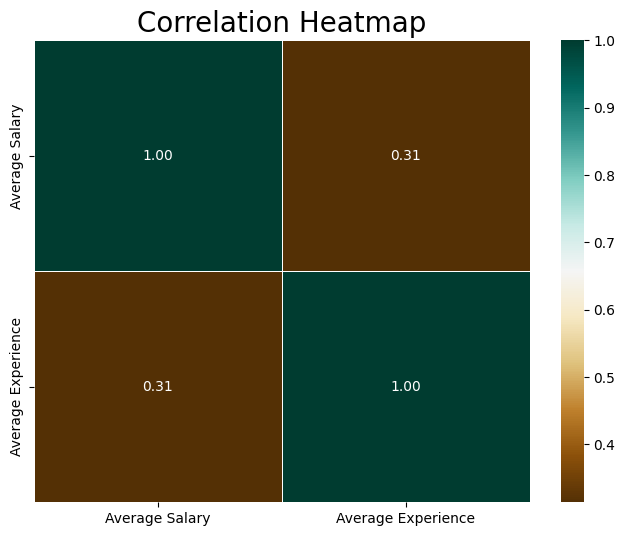

In [36]:
# Exclude rows with 'Not Provided' in the salary column
filter_df = df[df['Salary(Lacs p.a.)'] != 'Not Provided']

# Convert salary ranges to average salary
filter_df['Average Salary'] = filter_df['Salary(Lacs p.a.)'].apply(lambda x: sum(map(float, x.split('-'))) / 2)

# Exclude rows with 'Not Provided' in the experience column
filter_df = filter_df[filter_df['Experience Required(Years)'] != 'Not Provided']

# Convert experience ranges to average experience
filter_df['Average Experience'] = filter_df['Experience Required(Years)'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

# Create a correlation matrix
correlation_matrix = filter_df[['Average Salary', 'Average Experience']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap',fontsize=20)
plt.show()


#**Conclusion:**

In conclusion, the analysis of data scraped from TimesJobs offers a comprehensive understanding of the data science job market landscape in India. The identification of Python, SQL, Machine Learning, and Data Analysis as the most coveted skills underscores the industry's reliance on foundational programming and analytical capabilities. Bengaluru's prominence as a hub for data science opportunities aligns with its reputation as India's tech capital.

The dominance of full-time positions and the prevalence of on-site work arrangements reflect the traditional employment structure within the industry. However, the recognition of remote work as a viable option indicates a gradual shift towards more flexible work arrangements.

The delineation of salary clusters based on experience levels provides valuable insights for both job seekers and employers, highlighting salary expectations across different career stages. Moreover, the observed positive correlation between salary and experience reaffirms the value placed on seasoned professionals within the data science field.

By developing an intelligent tool that harnesses web scraping, data analysis, and visualization techniques, this project not only facilitates job search efficiency but also empowers stakeholders with actionable insights. While acknowledging the dynamic nature of the job market, the project serves as a reliable resource for professionals, job seekers, and recruiters navigating the evolving landscape of data science employment in India.

In essence, this project exemplifies the intersection of technology and data-driven insights in enhancing accessibility and informed decision-making within the realm of data science employment.